In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import lya_utils as ly
import jphot as jp
import os
reload(jp)

<module 'jphot' from 'jphot.pyc'>

# Test Gaussian emission 

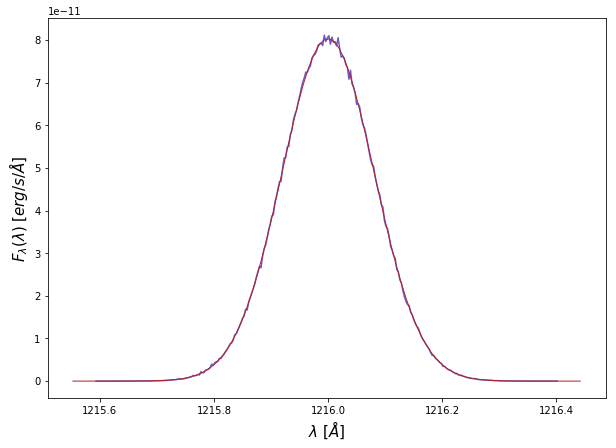

In [125]:
spec_gauss_l0_Ang = 1216.0
spec_gauss_sigma_kms = 20.0
# generate parameter file for PhotonsFromSourceModel
f = open('params.dat','w')
f.write('[PhotonsFromSourceModel]\n')
f.write('outputfile = res.res \n')
f.write('source_type = pointlike \n')
f.write('source_pos = 0.5 0.5 0.5 \n')
f.write('nphot = 1000000 \n')
f.write('spec_type = Gauss \n')
f.write('spec_gauss_l0_Ang = %e \n'%(spec_gauss_l0_Ang))
f.write('spec_gauss_sigma_kms = %e \n'%(spec_gauss_sigma_kms))
f.write('ranseed = -200 \n')
f.write('verbose = .true. \n')
f.close()
# run PhotonsFromSourceModel
os.system('../../f90/PhotonsFromSourceModel params.dat > PFSM.log')
# check the results 
p = jp.photonlist('res.res','',load=False)
p.load_ic()
l,s = p.spectrum(frame='ic',nbins=300,Flambda=True)
plt.figure(figsize=(10,7))
plt.plot(l,s,color='SlateBlue')
plt.ylabel(r'$F_\lambda(\lambda)\ [erg/s/\AA]$',fontsize=15)
plt.xlabel(r'$\lambda\ [\AA]$',fontsize=15)
# add analytic expression (make sure parameters are the same as in the params_PFS_test_Gauss.txt)
sigma_Ang = spec_gauss_sigma_kms * 1e5 / ly.clight * spec_gauss_l0_Ang 
x = np.linspace(plt.xlim()[0],plt.xlim()[1],100)
f = 1./np.sqrt(2.*np.pi*sigma_Ang**2)*np.exp(-(x-spec_gauss_l0_Ang)**2/2/sigma_Ang**2)
f = f * p.nRealPhotons * ly.h_cgs * ly.clight / (spec_gauss_l0_Ang*1e-8)
plt.plot(x,f,linewidth=1,color='FireBrick')

# Test Power Law emission

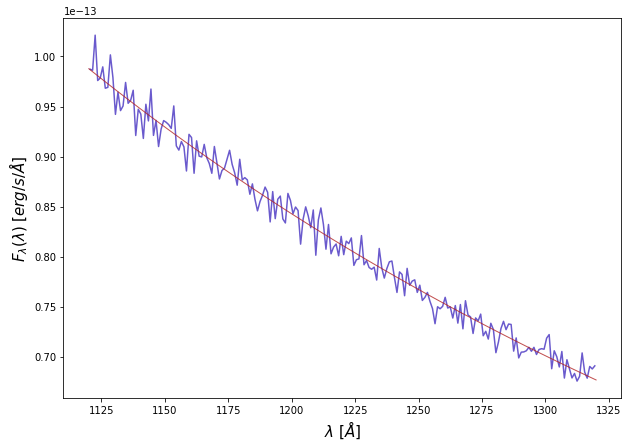

In [128]:
spec_powlaw_lmin_Ang = 1120.
spec_powlaw_lmax_Ang = 1320.
spec_powlaw_l0_Ang   = 1200.
spec_powlaw_beta     = -2.3
# generate parameter file for PhotonsFromSourceModel
f = open('params.dat','w')
f.write('[PhotonsFromSourceModel]\n')
f.write('outputfile = res.res \n')
f.write('source_type = pointlike \n')
f.write('source_pos = 0.5 0.5 0.5 \n')
f.write('nphot = 1000000 \n')
f.write('spec_type = PowLaw \n')
f.write('spec_powlaw_lmin_Ang = %e \n'%(spec_powlaw_lmin_Ang))
f.write('spec_powlaw_lmax_Ang = %e \n'%(spec_powlaw_lmax_Ang))
f.write('spec_powlaw_l0_Ang = %e \n'%(spec_powlaw_l0_Ang))
f.write('spec_powlaw_beta = %e \n'%(spec_powlaw_beta))
f.write('ranseed = -200 \n')
f.write('verbose = .true. \n')
f.close()
# run PhotonsFromSourceModel
os.system('../../f90/PhotonsFromSourceModel params.dat > PFSM.log')
# check the results 
p = jp.photonlist('res.res','',load=False)
p.load_ic()
l,s = p.spectrum(frame='ic',nbins=200,Flambda=True)
plt.figure(figsize=(10,7))
plt.plot(l,s,color='SlateBlue')
plt.ylabel(r'$F_\lambda(\lambda)\ [erg/s/\AA]$',fontsize=15)
plt.xlabel(r'$\lambda\ [\AA]$',fontsize=15)
# plot analytic solution
if spec_powlaw_beta == -2:
    F_0 = p.nRealPhotons * ly.h_cgs * ly.clight / (spec_powlaw_l0_Ang*1e-8) / spec_powlaw_l0_Ang / np.log(spec_powlaw_lmax_Ang/spec_powlaw_lmin_Ang)
else:
    F_0 = p.nRealPhotons * ly.h_cgs * ly.clight / (spec_powlaw_l0_Ang*1e-8) / spec_powlaw_l0_Ang * (2.+spec_powlaw_beta) / ((spec_powlaw_lmax_Ang/spec_powlaw_l0_Ang)**(spec_powlaw_beta+2) - (spec_powlaw_lmin_Ang/spec_powlaw_l0_Ang)**(spec_powlaw_beta+2))
x = np.linspace(spec_powlaw_lmin_Ang,spec_powlaw_lmax_Ang,num=100)
f = F_0*(x/spec_powlaw_l0_Ang)**(spec_powlaw_beta)
plt.plot(x,f,linewidth=1,alpha=0.8,color='FireBrick')

# Test tabulated-spectrum emission

age and metallicity : 4.534700e+08, 2.000000e-02


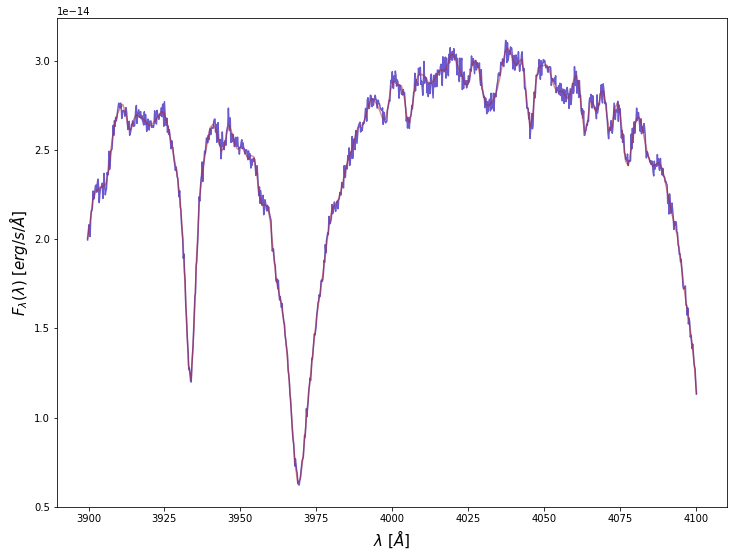

In [133]:
# generate a photometry table with rascas/py/PhotometryTables.ipynb
spec_table_file  = 'TabulatedContLya_Miles.txt'
spec_table_age   = 500.0  # Myr 
spec_table_met   = 0.021
# generate parameter file for PhotonsFromSourceModel
f = open('params.dat','w')
f.write('[PhotonsFromSourceModel]\n')
f.write('outputfile = res.res \n')
f.write('source_type = pointlike \n')
f.write('source_pos = 0.5 0.5 0.5 \n')
f.write('nphot = 5000000 \n')
f.write('spec_type = Table \n')
f.write('spec_table_file = %s \n'%(spec_table_file))
f.write('spec_table_age = %e \n'%(spec_table_age))
f.write('spec_table_met = %e \n'%(spec_table_met))
f.write('ranseed = -200 \n')
f.write('verbose = .true. \n')
f.close()
# run PhotonsFromSourceModel
os.system('../../f90/PhotonsFromSourceModel params.dat > PFSM.log')
# check the results 
p = jp.photonlist('res.res','',load=False)
p.load_ic()
l,s = p.spectrum(frame='ic',nbins=1000,Flambda=True)
plt.figure(figsize=(12,9))
plt.plot(l,s,color='SlateBlue')
plt.ylabel(r'$F_\lambda(\lambda)\ [erg/s/\AA]$',fontsize=15)
plt.xlabel(r'$\lambda\ [\AA]$',fontsize=15)
#plt.yscale('log')

## read the SEDs and plot 
# Function taken fron ramses utils, by Trebitsch & Rosdahl.

def readRamsesSEDs(sedDir):
    from scipy.io import FortranFile
    """Read SED in ramses format and return

    Parameters:
    ----------------------------------------------------------------------
    sedDir: Directory containing the SED tables
    """
    # Read metallicity bins
    ZFile = open(sedDir+'/metallicity_bins.dat', 'r')
    nZ = eval(ZFile.readline())
    ZBins = []
    for Z in range(0,nZ): ZBins.append(eval(ZFile.readline()))
    ZFile.close()

    # Read age bins
    ageFile = open(sedDir+'/age_bins.dat', 'r')
    nAge = eval(ageFile.readline())
    ageBins = []
    for age in range(0,nAge): ageBins.append(eval(ageFile.readline()))
    ageFile.close()

    # Read wavelength bins and spectra
    sedFile = FortranFile(sedDir+'/all_seds.dat','r')
    nLambda = sedFile.read_ints()[0]
    lambdaBins = sedFile.read_reals()
    spectra = np.empty([nLambda,nAge,nZ])
    for iZ in range(0,nZ):
        for iAge in range(0,nAge):
            spectrum = sedFile.read_reals()
            spectra[:,iAge,iZ] = spectrum  

    return {'ZBins':ZBins, 'ageBins':ageBins, 'lambdaBins':lambdaBins,'spectra':spectra}

# spectra are in [Lsun / A / Msun]
# with Lsun = 3.826e33 erg/s and Msun = 2e33g
Lsun_cgs = 3.826e33
Msun_cgs = 2e33
# read library
libName = 'Miles'  # can be 'Basel', 'Miles', or 'Stelib'
ssp = readRamsesSEDs('/Users/blaizot/Documents/Astro/seds/bc16_%s/'%(libName))
iage = -1
for i,a in enumerate(ssp['ageBins']):
    if a > spec_table_age*1e6:
        iage = i 
        if iage > 0:
            iage = iage -1 
        break
imet = -1
for i,a in enumerate(ssp['ZBins']):
    if a > spec_table_met:
        imet = i
        if imet > 0: 
            imet = imet - 1
        break
print "age and metallicity : %e, %e"%(ssp['ageBins'][iage],ssp['ZBins'][imet])

# compute normalisation of ssp
llow = min(l)
lup  = max(l)
ilow = np.where(abs(ssp['lambdaBins']-llow) == min(abs(ssp['lambdaBins']-llow)))[0][0]
iup  = np.where(abs(ssp['lambdaBins']-lup) == min(abs(ssp['lambdaBins']-lup)))[0][0]+1
flux = ssp['spectra'][ilow:iup,:,:] * Lsun_cgs # [erg/s/Msun/A]
lbda = ssp['lambdaBins'][ilow:iup]  # [A]
fl    = np.ravel(flux[:,iage,imet])  # [erg/s/A/Msun]
fl    = fl * lbda * 1.0e-8 / ly.h_cgs / (ly.clight) # [#/s/A/Msun]        
lll = lbda
fff = fl
# cumulative proba distribution of photons... (P(<lambda))
p = [0]
l = [lbda[0]]
pp = 0.
for i in np.arange(1,len(lll)):
    pp = pp + 0.5*(fff[i-1]+fff[i])*(lll[i]-lll[i-1])
    p.append(pp)
    l.append(lll[i])
f = flux / pp


        
xlim = plt.xlim()
#plt.plot(lbda, f[:,iage,imet],'.',markersize=15,alpha=0.5,color='FireBrick')
plt.plot(lbda, f[:,iage,imet],color='FireBrick',alpha=0.5)
plt.legend()
plt.xlim(xlim)

#plt.yscale('log')
#plt.ylim(0.0,0.25e-13)
#plt.xlim(1200,1240)
plt.savefig('spec.pdf')
